In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [434]:
df = pd.read_csv('data.csv')

In [120]:
first_df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [61]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# нанов нет, но как мы видели из head в smoking_status есть Unknow значения.

In [435]:
# посмотрим какие категориальные признаки есть в колонках
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [123]:
# В smoking_status есть пропуски в виде Unknown значений. Посмотрим как много
unknown_smokers = df[df['smoking_status'] == 'Unknown'].shape[0]
print(unknown_smokers)
unknown_smokers / df.shape[0]

1500


0.3011443485243927

In [436]:
# Преобразуем категориальные признаки для более легкого анализа
df["ever_married"] = df['ever_married'].map({'Yes':1,'No':0})
df["Residence_type"] = df["Residence_type"].map({'Urban':1,'Rural':0})
df["gender"] = df["gender"].map({'Male':0,'Female':1})

In [167]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.658502,0.508332,105.943562,28.498173,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.499981,45.075373,6.790464,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.850000,28.100000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,113.860000,32.600000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [318]:
df.groupby('stroke')['hypertension'].count()

stroke
0    4733
1     248
Name: hypertension, dtype: int64

In [ ]:
# видно, что есть корреляция в зависимости от возраста, гипертонией, болезнями сердца, уровня глюкозы. 
# так же влияет в браке человек или нет

In [66]:
df.groupby('stroke').median()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
stroke,,,,,,,,
0,1.0,43.0,0.0,0.0,1.0,1.0,91.45,28.00
1,1.0,71.0,0.0,0.0,1.0,1.0,105.04,29.45


In [ ]:
# распределение не нормальное

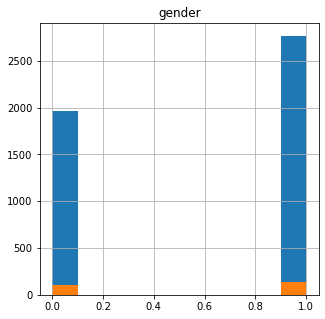

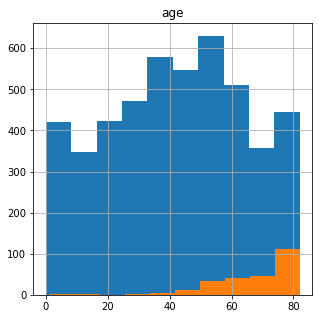

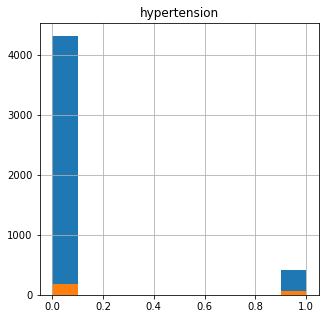

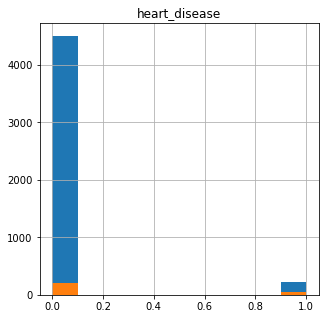

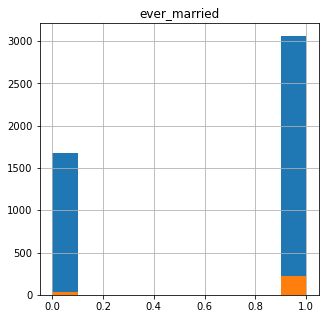

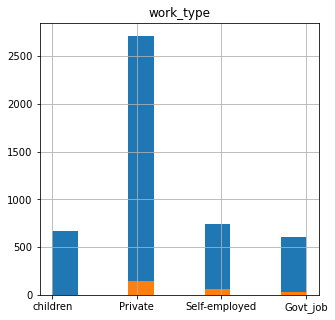

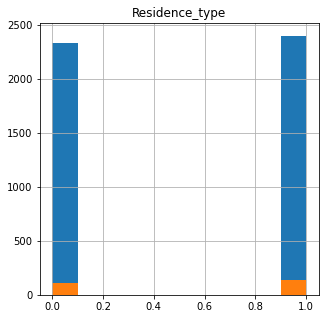

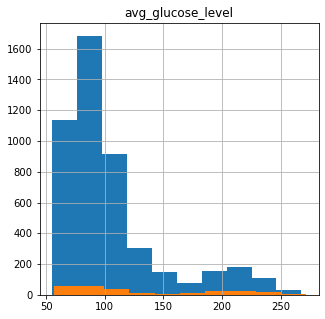

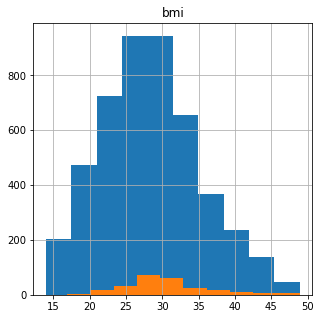

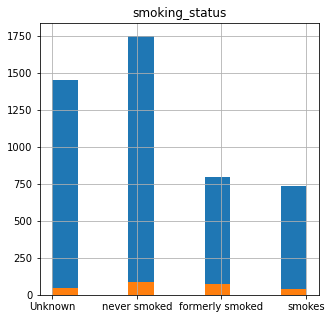

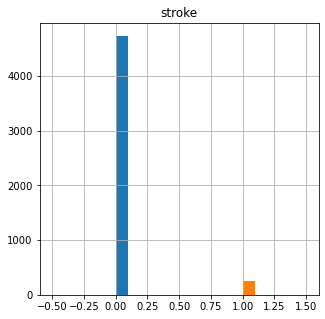

In [431]:
for column in df.columns:
    plt.figure(figsize = (5,5))
    plt.title(column)
    df.groupby('stroke')[column].hist()

In [ ]:
# Предварительные выводы по гистограммам:
#     1. Женщин в выборке больше, чем мужчин и не понятно влияет ли пол на показатели целевой переменной. Сложно сказать.
#     2. Видна явная корреляция целевого признака от возраста. Чем взрослее человек, чем чаще у него инсульт.
#     3. Так же судя по всему чаще случается инсульт у людей с гипертонией, хотя самих людей с гипертонией в выборке достаточно мало относительно остальных
#     4. Точно есть влияние болезней сердца на целевую переменную. Хоть таких людей и не много, но в процентном отношении у них чаще случаются инсульты.
#     5. Похоже, что женатые/замужние чаще подвержены риску инсультов. Вот это да o_O. Кстати, интересно будет глянуть кто из супругов чаще подвергается инсультам, мужчины или женщины. Проверим чуть позже
#     6. Сложно как работа влияет на инсульты.Чуть позже проанализируем более подробно
#     7. Люди в городах чуть чаще попадают в группу с целевой переменной
#     8. Высокая глюкоза тоже немного сказывается
#     9. bmi вообще как-будто не влияет
#     10. Те, кто когда-то курил и курят сейчас почаще встречаются в группе с целевой переменной

In [319]:
print((df['stroke']== 1).sum())
print((df['stroke']== 0).sum())
print((df['stroke']== 1).sum() / (df['stroke']== 0).sum())

248
4733
0.05239805620114093


In [ ]:
# доля инсультов составляет 5.23% от общей выборки

In [365]:
df.groupby('stroke')['gender'].mean()

stroke
0    0.584619
1    0.564516
Name: gender, dtype: float64

In [388]:
df.groupby('stroke')['avg_glucose_level'].mean()

stroke
0    104.569056
1    132.175565
Name: avg_glucose_level, dtype: float64

In [432]:
df.groupby('stroke')['bmi'].mean()

stroke
0    28.409698
1    30.186694
Name: bmi, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

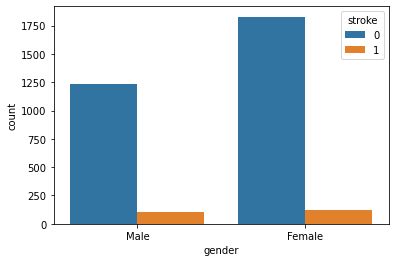

In [422]:
sns.countplot(x='gender', data=df[df['ever_married'] == 'Yes'], hue='stroke')

In [425]:
married = df[df['ever_married'] == 'Yes']
married.groupby('gender').size()[0]/married.groupby('gender').size()[1]

1.4624624624624625

In [ ]:
# женщин в браке почти в 1.5 раза больше в выборке чем мужчин в браке
# посмотрим теперь как часто в группе женатых/замужних случаются инсульты

<AxesSubplot:title={'center':'Strokes in marriage by gender'}, ylabel='stroke'>

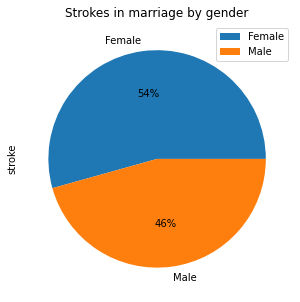

In [423]:
df[df['ever_married'] == 'Yes'].groupby('gender').sum().plot(y='stroke', kind='pie', autopct='%1.0f%%', title='Strokes in marriage by gender', figsize=(5, 5))

In [ ]:
# почти поровну, но так как женщин меньше в целом, то могу сделать вывод, что мужчины в браке чаще сталкиваются с инсультами ;(

<AxesSubplot:title={'center':'Strokes by work type'}, ylabel='stroke'>

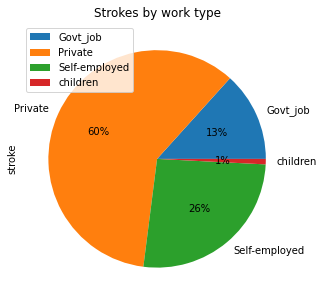

In [72]:
df.groupby('work_type').sum().plot(y='stroke', kind='pie', figsize=(5, 5), title='Strokes by work type', autopct='%1.0f%%')

stroke
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: work_type, dtype: object

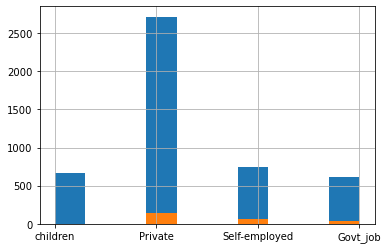

In [130]:
# Как мы знаем Private категория самая многочисленая. В пропорции, всё не так страшно
df.groupby('stroke')['work_type'].hist()

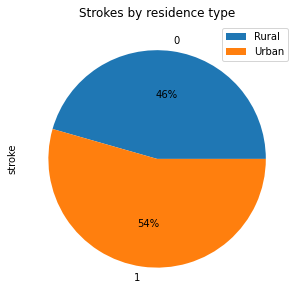

In [169]:
#  Посмотрим по Residence_type
fig, ax = plt.subplots()
df.groupby('Residence_type').sum().plot(y='stroke', kind='pie', figsize=(5, 5), title='Strokes by residence type', autopct='%1.0f%%', ax=ax)
ax.legend(['Rural', 'Urban'])

<AxesSubplot:title={'center':'Strokes by smoking status'}, ylabel='stroke'>

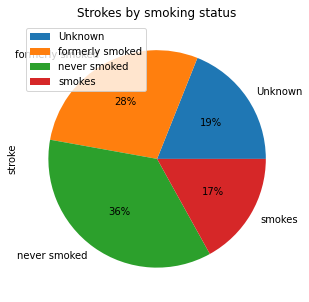

In [132]:
# По чего там с курением
df.groupby('smoking_status').sum().plot(y='stroke', kind='pie', figsize=(5, 5), title='Strokes by smoking status', autopct='%1.0f%%')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

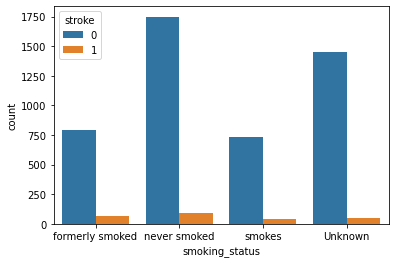

In [430]:
sns.countplot(x='smoking_status', data=df, hue='stroke')

stroke
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: smoking_status, dtype: object

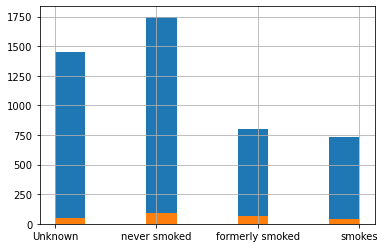

In [133]:
df.groupby('stroke')['smoking_status'].hist()

<AxesSubplot:>

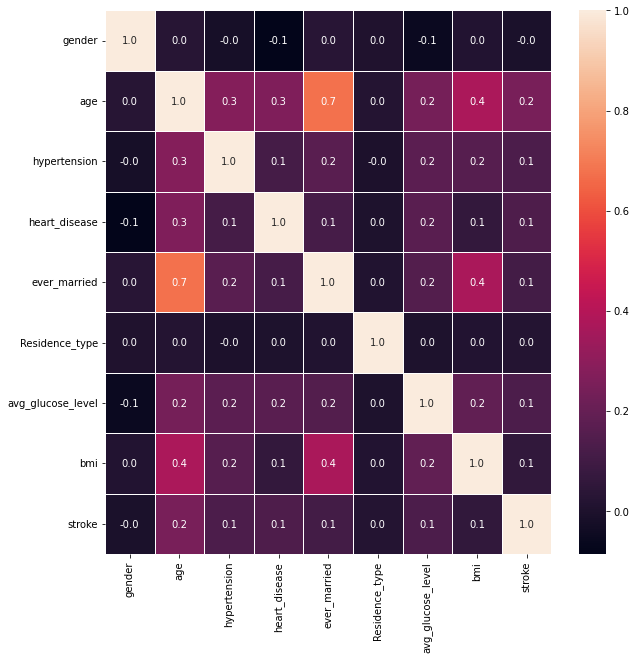

In [433]:
corr = df.corr()
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
# ни у одного из признаков нет выраженной корреляции

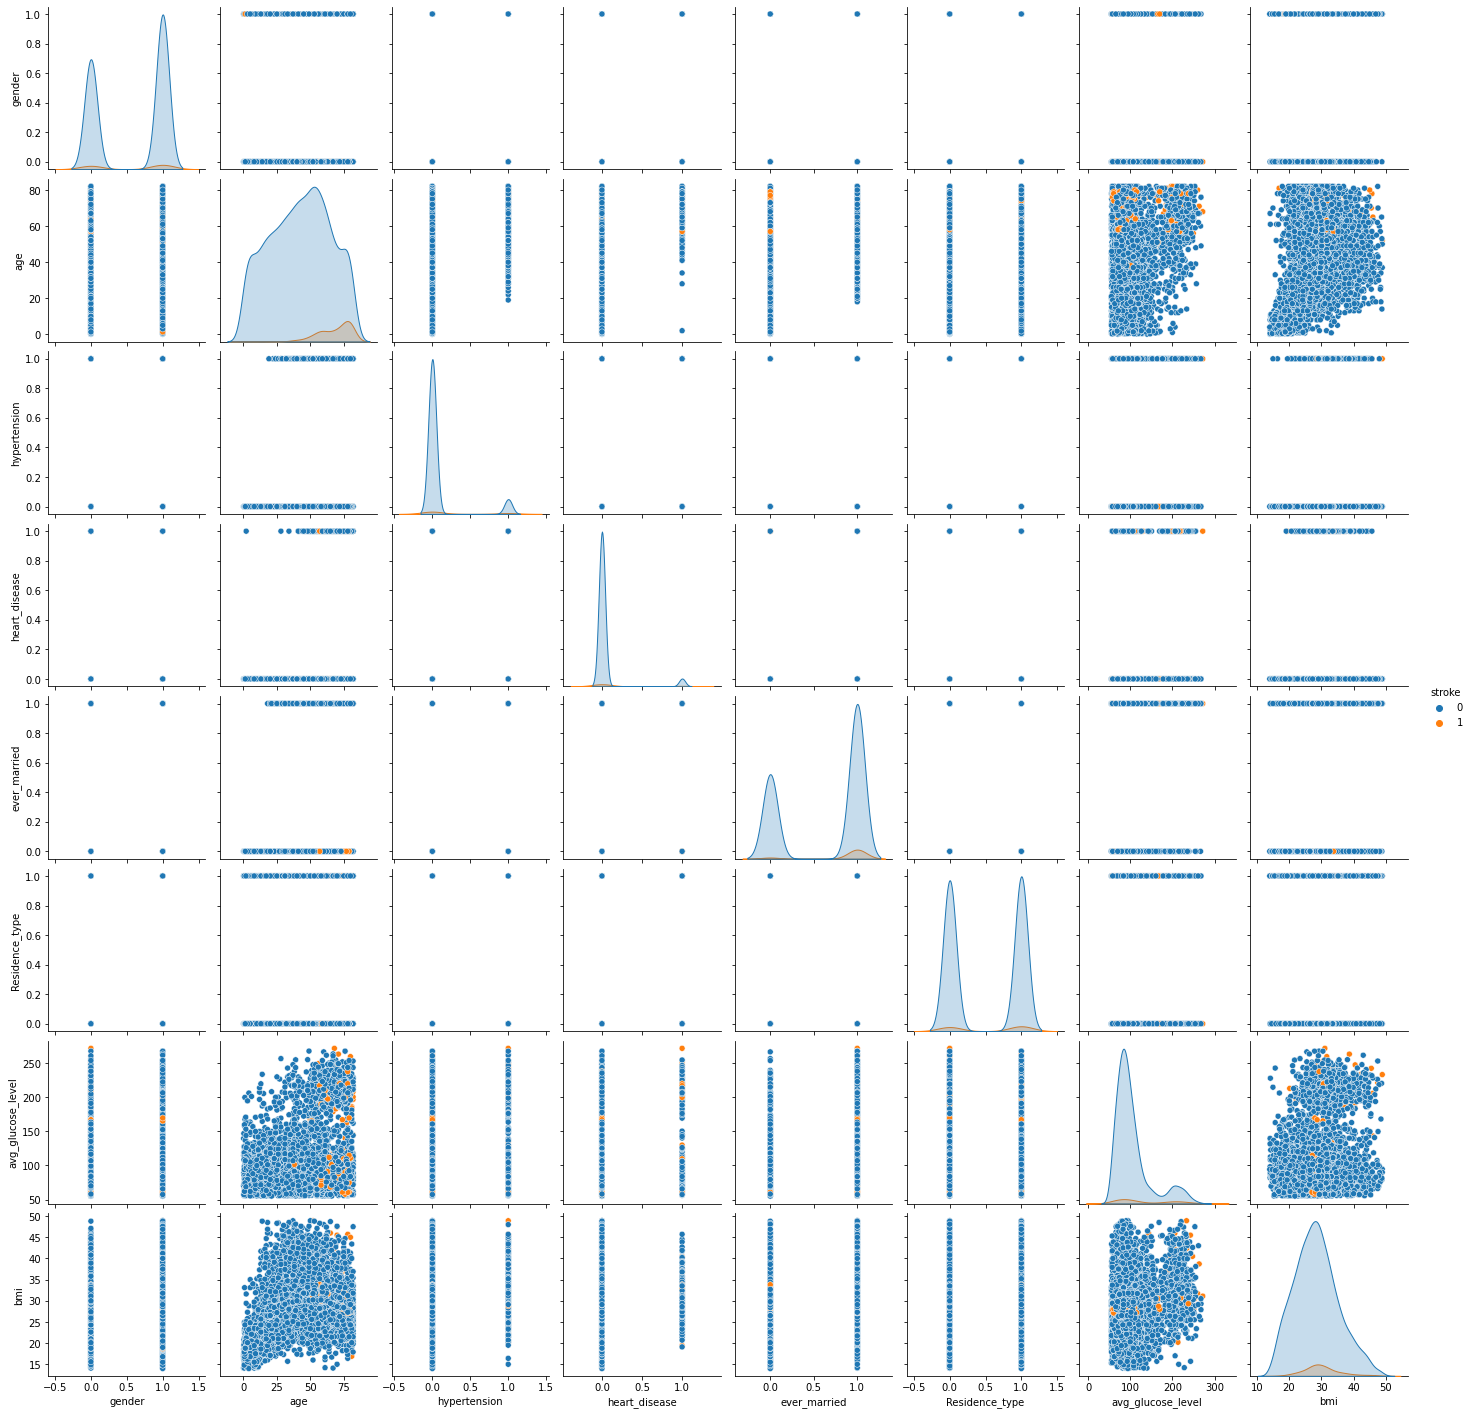

In [78]:
sns.pairplot(df[df.columns], hue='stroke')

In [ ]:
# Попробуем обучить модель для предсказывания вероятности инсульта. 
# kNN пробовать не буду, так как он тут не подойдёт. Как стандартный вариант можно посмотреть как будет работать линейная регрессия, 
# логистическая регрессия может смотреться не плохо, так как нет большой корреляции между признаками.
# так же кажется, что дерево решений может работать хорошо

In [437]:
df = pd.get_dummies(df, columns = ['work_type','smoking_status'])
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2663,0,71.0,1,0,1,0,97.57,26.9,0,0,0,1,0,1,0,0,0
558,0,33.0,0,0,1,0,219.97,39.6,0,0,1,0,0,0,0,1,0
4544,1,49.0,0,0,1,1,206.53,44.5,0,0,1,0,0,0,0,0,1
3125,0,41.0,0,0,0,1,87.44,33.5,0,0,0,1,0,1,0,0,0
1646,0,13.0,0,0,0,0,137.45,18.2,0,0,0,0,1,1,0,0,0


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


X = df.drop(['stroke'], axis = 1)
y = df['stroke']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# scaler = MinMaxScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3337, 16), (1644, 16), (3337,), (1644,))

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_train_pred_knn = knn.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_knn))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred_knn))
print(classification_report(y_test, y_pred_knn))

print(confusion_matrix(y_test, y_pred_knn))

Test MSE = 0.0535
Train MSE = 0.0500
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1559
           1       0.29      0.02      0.04        85

    accuracy                           0.95      1644
   macro avg       0.62      0.51      0.51      1644
weighted avg       0.91      0.95      0.92      1644

[[1554    5]
 [  83    2]]


In [200]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
y_train_pred_lr = model.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_lr))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred_lr))

Test MSE = 0.0444
Train MSE = 0.0431


In [201]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_pred_train_log = log_reg.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_log))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_pred_train_log))

print(classification_report(y_test, y_pred_log))

Test MSE = 0.0517
Train MSE = 0.0488
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1559
           1       0.00      0.00      0.00        85

    accuracy                           0.95      1644
   macro avg       0.47      0.50      0.49      1644
weighted avg       0.90      0.95      0.92      1644



/Users/vfomenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vfomenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vfomenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5, criterion='gini')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
y_pred_train_clf = clf.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_clf))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_pred_train_clf))

print(classification_report(y_test, y_pred_clf))

print(confusion_matrix(y_test, y_pred_clf))

Test MSE = 0.0493
Train MSE = 0.0473
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1559
           1       1.00      0.05      0.09        85

    accuracy                           0.95      1644
   macro avg       0.98      0.52      0.53      1644
weighted avg       0.95      0.95      0.93      1644

[[1559    0]
 [  81    4]]


In [438]:
from sklearn.utils import resample
stroke=df[df['stroke']==1]
print(len(stroke))
no_stroke = resample(df[df['stroke']==0],
             replace=True,
             n_samples=248,
             random_state=42)
df=pd.concat([stroke,no_stroke])
df

248


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,0,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
2,1,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
3,1,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,0,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,1,55.0,0,1,1,1,199.38,39.0,0,0,1,0,0,1,0,0,0
2943,1,57.0,0,0,1,0,98.57,31.6,0,0,1,0,0,0,0,1,0
4763,0,26.0,0,0,0,0,100.85,21.0,0,1,0,0,0,0,0,0,1
1162,1,43.0,0,0,0,0,101.75,26.7,0,0,1,0,0,0,0,0,1


stroke
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: stroke, dtype: object

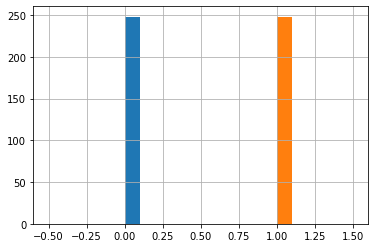

In [439]:
df.groupby('stroke')['stroke'].hist()

In [440]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=17)


X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((332, 16), (164, 16), (332,), (164,))

In [441]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_train_pred_knn = knn.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_knn))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred_knn))
print(classification_report(y_test, y_pred_knn))

print(confusion_matrix(y_test, y_pred_knn))

Test MSE = 0.2805
Train MSE = 0.2500
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        82
           1       0.72      0.71      0.72        82

    accuracy                           0.72       164
   macro avg       0.72      0.72      0.72       164
weighted avg       0.72      0.72      0.72       164

[[60 22]
 [24 58]]


In [457]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
y_pred_train_clf = clf.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_clf))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_pred_train_clf))

print(classification_report(y_test, y_pred_clf))

print(confusion_matrix(y_test, y_pred_clf))

Test MSE = 0.2500
Train MSE = 0.0000
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        82
           1       0.75      0.74      0.75        82

    accuracy                           0.75       164
   macro avg       0.75      0.75      0.75       164
weighted avg       0.75      0.75      0.75       164

[[62 20]
 [21 61]]


In [458]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_pred_train_log = log_reg.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_log))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_pred_train_log))

print(classification_report(y_test, y_pred_log))

Test MSE = 0.1951
Train MSE = 0.1867
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        82
           1       0.80      0.82      0.81        82

    accuracy                           0.80       164
   macro avg       0.81      0.80      0.80       164
weighted avg       0.81      0.80      0.80       164



In [474]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200,random_state=47)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred, y_test))
print('ROC-AUC', round(roc_auc_score(y_test, est.predict_proba(X_test)[:,1]),3))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        78
           1       0.87      0.83      0.85        86

    accuracy                           0.84       164
   macro avg       0.84      0.84      0.84       164
weighted avg       0.84      0.84      0.84       164

[[67 11]
 [15 71]]
ROC-AUC 0.884


In [477]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

est = GradientBoostingClassifier(n_estimators=200, max_depth=3)
est.fit(X_train, y_train)

pred = est.predict(X_test)
est.predict_proba(X_test)[0]  
print(classification_report(pred,y_test))
print(confusion_matrix(pred, y_test))
print('ROC-AUC', round(roc_auc_score(y_test, est.predict_proba(X_test)[:,1]),3))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.85      0.80      0.83        87

    accuracy                           0.82       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.83      0.82      0.82       164

[[65 12]
 [17 70]]
ROC-AUC 0.883
